In [1120]:
import importlib.util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1121]:
spec = importlib.util.spec_from_file_location("DataPreprocessing", "/home/admin1/PycharmProjects/Machine_learning_Python/Utility/DataPreprocessing.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
preprocess_obj = foo.DataPreprocessing()

Data PreProcessign object created successfully


In [1122]:
dataframe = pd.read_csv("Data/weatherHistory.csv")

In [1123]:
dataframe.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [1124]:
dataframe = dataframe.head(2000)

In [1125]:
dataframe = dataframe.rename(columns=({'Apparent Temperature (C)':'y'}))

In [1126]:
dataframe = dataframe.drop(['Formatted Date','Summary','Precip Type','Loud Cover','Daily Summary'], axis =1 )

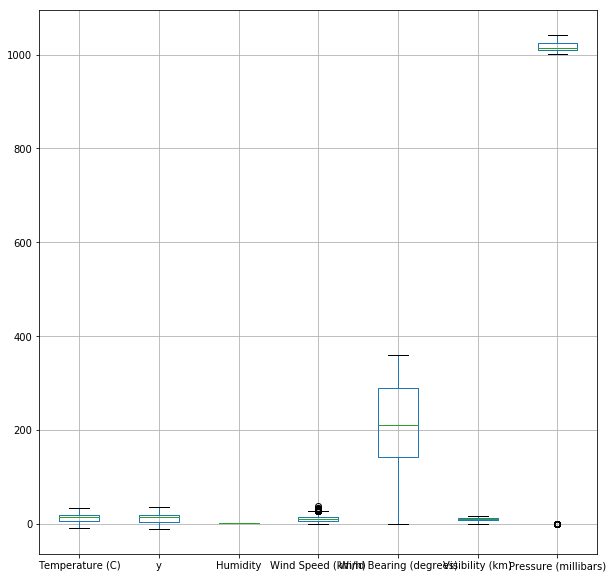

In [1127]:
dataframe.boxplot(figsize=(10,10))

In [1128]:
dataframe = preprocess_obj.remove_outlier(dataframe)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f76e67438>,
      dtype=object)

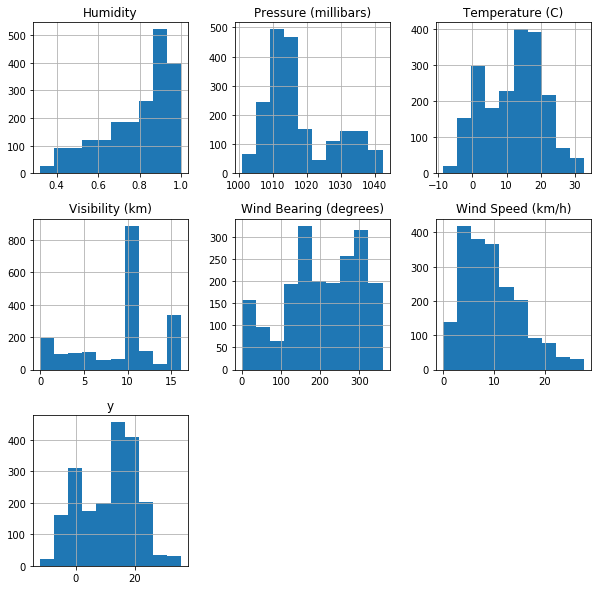

In [1129]:
dataframe.hist(figsize=(10,10))

In [1130]:
dataframe = dataframe.dropna()

In [1131]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924 entries, 0 to 1999
Data columns (total 7 columns):
Temperature (C)           1924 non-null float64
y                         1924 non-null float64
Humidity                  1924 non-null float64
Wind Speed (km/h)         1924 non-null float64
Wind Bearing (degrees)    1924 non-null float64
Visibility (km)           1924 non-null float64
Pressure (millibars)      1924 non-null float64
dtypes: float64(7)
memory usage: 120.2 KB


In [1132]:
(dataframe==0).sum()

Temperature (C)            3
y                          1
Humidity                   0
Wind Speed (km/h)         11
Wind Bearing (degrees)    18
Visibility (km)            6
Pressure (millibars)       0
dtype: int64

In [1133]:
dataframe, test_data = preprocess_obj.split(dataframe,500)

In [1134]:
test_data.shape

(500, 7)

In [1135]:
test_data = test_data[test_data['y'] != 0]
test_data.shape

(499, 7)

In [1136]:
y = dataframe['y']

In [1137]:
dataframe = preprocess_obj.standardize(dataframe)

In [1138]:
# dataframe['y']=y

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f766b64e0>,
      dtype=object)

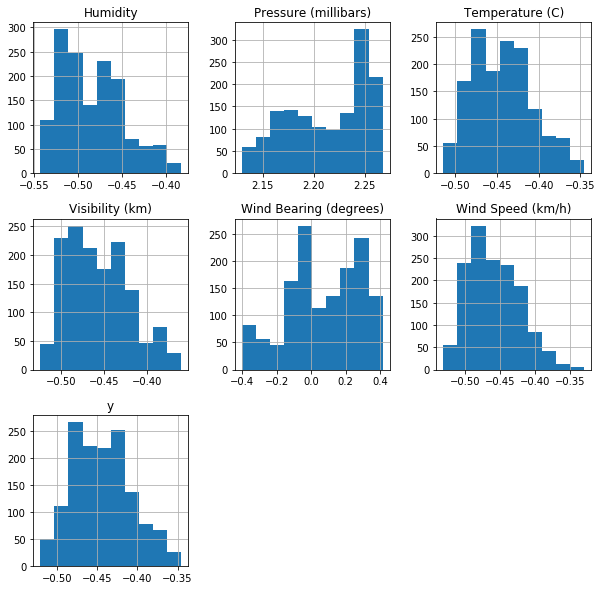

In [1139]:
dataframe.hist(figsize=(10,10))

In [1140]:
# sns.distplot(dataframe, color=['r','g','b','y','black','#ed0740','#ed9c07'])
# for items in dataframe:
#     sns.distplot(dataframe[items])
#     plt.show()

In [1141]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),1424.0,-0.442772,0.035844,-0.514295,-0.472580,-0.442793,-0.418741,-0.345492
y,1424.0,-0.443402,0.036364,-0.520685,-0.472638,-0.443271,-0.418716,-0.345492
Humidity,1424.0,-0.483154,0.035481,-0.542616,-0.513872,-0.489346,-0.459674,-0.382778
Wind Speed (km/h),1424.0,-0.458902,0.036215,-0.531544,-0.487522,-0.463827,-0.433006,-0.329710
Wind Bearing (degrees),1424.0,0.070813,0.209656,-0.401686,-0.072537,0.080623,0.253557,0.413737
Visibility (km),1424.0,-0.455852,0.035902,-0.523807,-0.485792,-0.461128,-0.430370,-0.360381
Pressure (millibars),1424.0,2.213269,0.039453,2.129432,2.179338,2.221050,2.246766,2.267696


In [1142]:
class Gradient_multilinear:

    def __init__(self):
        self.learning_rate = 0.001
        self.iteration = 349
        self.sample_size = 500
        
    def mini_sampler(self,dataframe,counter):
        dataframe = dataframe.loc[(counter*self.sample_size):(counter*self.sample_size)+self.sample_size,:]
        try:
            dataframe.drop('index')
        except Exception as e:
            pass
        return dataframe
    
    def train(self, dataframe):
        weights = np.full((1,dataframe.shape[1]-1),1.0)
        dframe_size = len(dataframe)
        bais = 1.2
        for iterations in range(0,self.iteration):            
            for counter in range(0, int(dataframe.shape[0]/self.sample_size)):
                sample_df = self.mini_sampler(dataframe,counter)
                sample_df,output = preprocess_obj.separate(sample_df,'y')
                output = np.array(output).reshape(output.shape[0],1)
                Ypred = np.add(np.matmul(weights,sample_df.T),bais).reshape(sample_df.shape[0],1)
                diff = np.subtract(output,Ypred)
                cost = np.divide(np.sum(np.square(diff)),(2*sample_df.shape[0]))
#                 cost = np.sum(np.square(diff))/(2*dframe_size)
                diff = abs(diff)
                if (cost==np.inf):
                    print(diff,Ypred.T,output.T,iterations,counter)
                dw = np.divide(np.matmul(diff.T,sample_df),sample_df.shape[0])
                db = np.divide(np.sum(diff),sample_df.shape[0])
                weights = np.subtract(weights,np.multiply(self.learning_rate,dw))
                bais -= np.multiply(self.learning_rate,db)
            plt.plot(iterations,cost,markersize = 0.8,marker='*',color='r')
        return weights,bais
    
    
    def test(self,test_data,weights,bais):
        test_data = test_data[test_data['y'] != 0]
        test_data,Y = preprocess_obj.separate(test_data,'y')
        Y = np.array(Y).reshape(Y.shape[0],1)
        Ypred = np.add(np.dot(test_data,weights.T),bais)
        print(Y.shape,Ypred.shape)
        error = np.divide(np.subtract(Ypred,Y),Y.sum())
        accuracy = np.divide(np.abs(np.sum(error)),test_data.shape[0])
        print("Accuracy = ",accuracy*100)

In [1143]:
grad_obj = Gradient_multilinear()

In [1144]:
weights = np.full((1,dataframe.shape[1]-1),1.0)

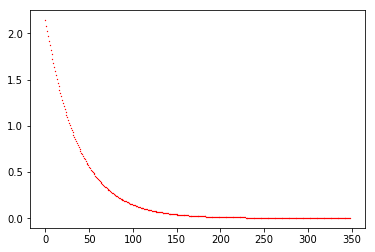

In [1145]:
weights,bais = grad_obj.train(dataframe)

In [1146]:
print(test_data.shape,weights.shape,bais.shape)

(499, 7) (1, 6) ()


In [1147]:
grad_obj.test(test_data,weights,bais)

(499, 1) (499, 1)
Accuracy =  62.77685583835455
